<a href="https://colab.research.google.com/github/santiasann/DNA-Classification-by-IBM-Granite-Model/blob/main/IBM_DNA_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('synthetic_dna_dataset.csv')
df = df.drop(columns=['Sequence_Length', 'Sample_ID'])
df = df.drop_duplicates()
df

,Sequence,GC_Content,AT_Content,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk
0,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...,50.0,50.0,22,28,19,31,0.986,0,Bacteria,High
1,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...,45.0,55.0,27,28,22,23,0.486,1,Virus,Medium
2,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...,51.0,49.0,26,23,30,21,0.367,1,Bacteria,Low
3,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTG...,55.0,45.0,28,17,23,32,0.404,0,Human,Medium
4,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTT...,46.0,54.0,24,30,25,21,0.818,0,Human,High
...,...,...,...,...,...,...,...,...,...,...,...
2995,GATCAGCCCATACACCAAATCAATTGCATACATGTCCGATGTAACA...,46.0,54.0,30,24,27,19,0.786,1,Plant,Medium
2996,TGTTGTGTGTCTGATGATAGGTCATACCGCCTCGAAACATCACCAT...,49.0,51.0,28,23,24,25,0.831,0,Plant,Medium
2997,GACCCACTAAAAGTCTTCGTCTCCTTCCGATGGGAATTTTCGCCGA...,53.0,47.0,21,26,30,23,0.140,0,Virus,Medium
2998,CCAAAGGATATCTGTAATTGTTGCAGCGCCCCTACAATTTGAGCAC...,46.0,54.0,26,28,25,21,0.685,0,Plant,Medium


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sequence       3000 non-null   object 
 1   GC_Content     3000 non-null   float64
 2   AT_Content     3000 non-null   float64
 3   Num_A          3000 non-null   int64  
 4   Num_T          3000 non-null   int64  
 5   Num_C          3000 non-null   int64  
 6   Num_G          3000 non-null   int64  
 7   kmer_3_freq    3000 non-null   float64
 8   Mutation_Flag  3000 non-null   int64  
 9   Class_Label    3000 non-null   object 
 10  Disease_Risk   3000 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 257.9+ KB


In [ ]:
df.nunique(axis=0, dropna=True)

,0
Sequence,3000
GC_Content,33
AT_Content,33
Num_A,30
Num_T,32
Num_C,32
Num_G,30
kmer_3_freq,872
Mutation_Flag,2
Class_Label,4


In [ ]:
df.isnull().sum()

,0
Sequence,0
GC_Content,0
AT_Content,0
Num_A,0
Num_T,0
Num_C,0
Num_G,0
kmer_3_freq,0
Mutation_Flag,0
Class_Label,0


EDA

In [ ]:
df.columns

Index(['Sequence', 'GC_Content', 'AT_Content', 'Num_A', 'Num_T', 'Num_C',
       'Num_G', 'kmer_3_freq', 'Mutation_Flag', 'Class_Label', 'Disease_Risk'],
      dtype='object')

/tmp/ipython-input-2388592365.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='Class_Label', palette='viridis')


<Figure size 1000x600 with 0 Axes>

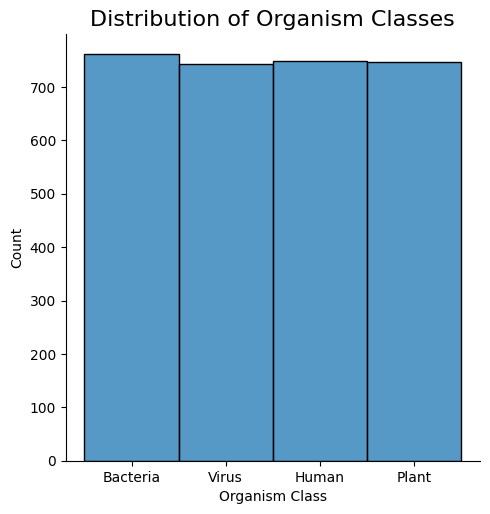

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(data=df, x='Class_Label', palette='viridis')
plt.title('Distribution of Organism Classes', fontsize=16)
plt.xlabel('Organism Class')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1894203921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Disease_Risk', y='kmer_3_freq', palette='muted')


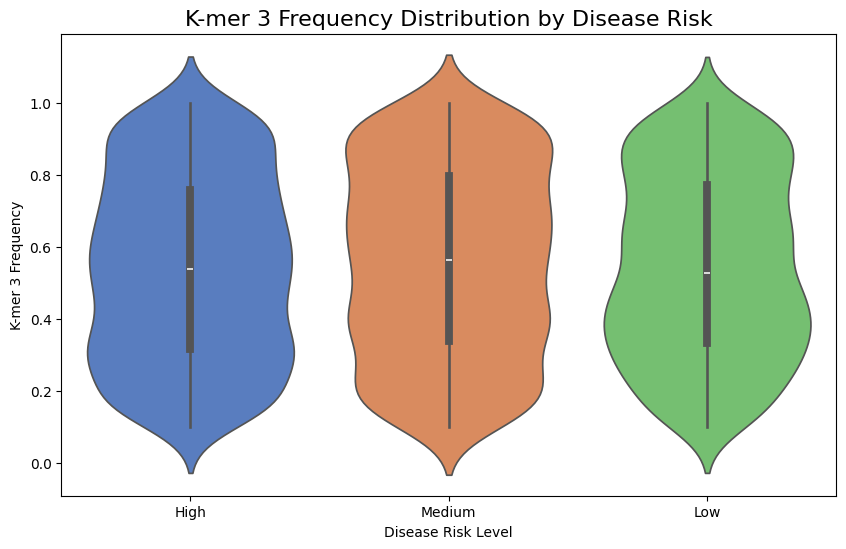

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Disease_Risk', y='kmer_3_freq', palette='muted')
plt.title('K-mer 3 Frequency Distribution by Disease Risk', fontsize=16)
plt.xlabel('Disease Risk Level')
plt.ylabel('K-mer 3 Frequency')
plt.show()

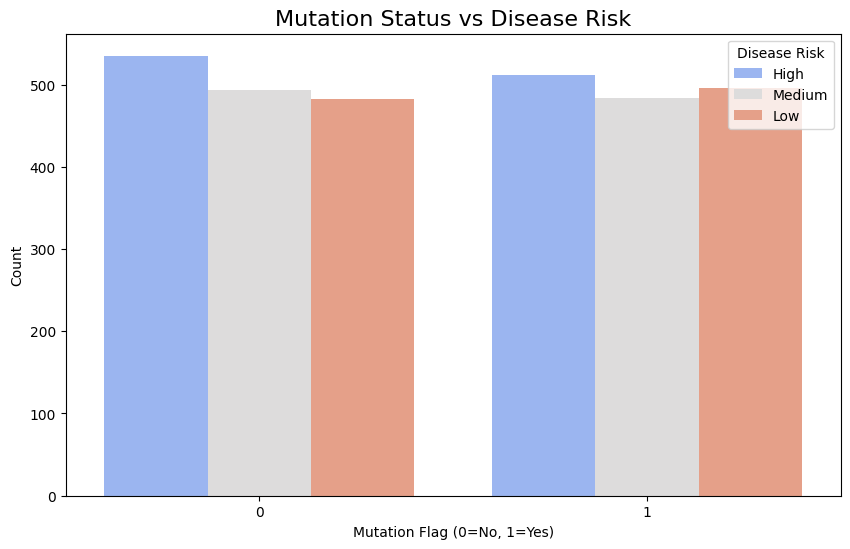

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mutation_Flag', hue='Disease_Risk', palette='coolwarm')
plt.title('Mutation Status vs Disease Risk', fontsize=16)
plt.xlabel('Mutation Flag (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Disease Risk')
plt.show()

In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
import os
from langchain_community.llms import Replicate
from google.colab import userdata

In [ ]:
#SET API TOKEN
api_token = userdata.get('API_TOKEN')
os.environ['REPLICATE_API_TOKEN'] = api_token

In [ ]:
#SET MODEL
model = "ibm-granite/granite-3.3-8b-instruct"
output= Replicate(
    model=model, replicate_api_token=api_token)

In [ ]:
batch_size = 512 # You can adjust this batch size as needed

# Initialize lists to store results
predicted_classes = []
predicted_risks = []

for i in range(0, len(df), batch_size):
    batch_df = df.iloc[i:i+batch_size]

    # Create the prompt for the current batch using numerical features
    dna_data = "\n".join([
        f"DNA {j+1}: Sequence={row['Sequence']}, GC_Content={row['GC_Content']}, AT_Content={row['AT_Content']}, Num_A={row['Num_A']}, Num_T={row['Num_T']}, Num_C={row['Num_C']}, Num_G={row['Num_G']}, kmer_3_freq={row['kmer_3_freq']}, Mutation_Flag={row['Mutation_Flag']}"
        for j, (index, row) in enumerate(batch_df.iterrows())
    ])

    prompt = f""":
      Classify these DNA based on the provided features (GC_Content, AT_Content, Num_A, Num_T, Num_C, Num_G, kmer_3_freq, Mutation_Flag)
      and predict their Class Label (human, virus, bacteria, or plant) and Disease Risk status (low, medium, or high).
      {dna_data}

      For each DNA, provide the predicted Class Label and Disease Risk in the format:
      DNA [number]: Predicted Class Label - [Predicted Class], Predicted Disease Risk - [Predicted Risk]
    """

    try:
        response = output.invoke(prompt)

        if i == 0:
            print("--- Model Response for First Batch ---")
            print(response)
            print("------------------------------------")

        # Process the response (this part might need adjustment based on the model's output format)
        # Assuming the model returns classifications and risks in the specified format
        lines = response.strip().split('\n')
        batch_predicted_classes = ["Unknown"] * len(batch_df)
        batch_predicted_risks = ["Unknown"] * len(batch_df)

        for line in lines:
            if line.startswith("DNA"):
                try:
                    parts = line.split(":")
                    dna_number = int(parts[0].replace("DNA", "").strip()) - 1
                    if 0 <= dna_number < len(batch_df):
                        # This parsing logic needs to be adapted to the actual model output format
                        # This is a placeholder based on the prompt structure
                        classification_risk_parts = ":".join(parts[1:]).split(",")
                        classification = classification_risk_parts[0].replace("Predicted Class Label -", "").strip() if len(classification_risk_parts) > 0 else "Unknown"
                        risk = classification_risk_parts[1].replace("Predicted Disease Risk -", "").strip() if len(classification_risk_parts) > 1 else "Unknown"

                        batch_predicted_classes[dna_number] = classification
                        batch_predicted_risks[dna_number] = risk
                except (ValueError, IndexError):
                    pass

        predicted_classes.extend(batch_predicted_classes)
        predicted_risks.extend(batch_predicted_risks)

    except Exception as e:
        print(f"Error processing batch {i//batch_size}: {e}")
        predicted_classes.extend(["Unknown"] * len(batch_df))
        predicted_risks.extend(["Unknown"] * len(batch_df))

# Add the predicted results to the DataFrame
df['predicted_class'] = predicted_classes
df['predicted_risk'] = predicted_risks

# Display the DataFrame with predictions
display(df.head())

--- Model Response for First Batch ---
Based on the provided features, predicting the exact class label (human, virus, bacteria, or plant) and disease risk (low, medium, or high) would require a trained machine learning model or a predefined rule-based system, which is not available here. However, I can demonstrate how such predictions might look if we had that information. 

Since we don't have a model or rules to apply, I'll outline the format for presenting such predictions:

DNA 1: Predicted Class Label - Human, Predicted Disease Risk - Low
DNA 2: Predicted Class Label - Virus, Predicted Disease Risk - Medium
DNA 3: Predicted Class Label - Bacteria, Predicted Disease Risk - High
DNA 4: Predicted Class Label - Plant, Predicted Disease Risk - Low

... and so forth for each DNA sequence number from 5 to 512.

Please note that without a specific model or criteria for classification and risk assessment, these predictions are hypothetical and cannot be accurate. To get actual predictions

,Sequence,GC_Content,AT_Content,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk,predicted_class,predicted_risk
0,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...,50.0,50.0,22,28,19,31,0.986,0,Bacteria,High,Human,Low
1,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...,45.0,55.0,27,28,22,23,0.486,1,Virus,Medium,Virus,Medium
2,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...,51.0,49.0,26,23,30,21,0.367,1,Bacteria,Low,Bacteria,High
3,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTG...,55.0,45.0,28,17,23,32,0.404,0,Human,Medium,Plant,Low
4,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTT...,46.0,54.0,24,30,25,21,0.818,0,Human,High,Unknown,Unknown


In [ ]:
# Set model parameters for prompting with default values
parameters = {
 "top_k": 10,
 "top_p": 0.7,
 "max_tokens": 180,
 "min_tokens": 0,
 "random_seed": None,
 "repetition_penalty": 1.8,
 "stopping_criteria": "length (256 tokens)",
 "stopping_sequence": None
}

# # Invoke the model
# response = output.invoke(refined_prompt, parameters=parameters)

# # Print the response
# print("Granite Model Refined Response:\n")
# print(response)

In [ ]:
batch_size = 128 # You can adjust this batch size as needed

# Initialize lists to store results
predicted_classes_fine = []
predicted_risks_fine = []

for i in range(0, len(df), batch_size):
    batch_df = df.iloc[i:i+batch_size]

    # Create the prompt for the current batch using numerical features
    dna_data = "\n".join([
        f"DNA {j+1}: Sequence={row['Sequence']}, GC_Content={row['GC_Content']}, AT_Content={row['AT_Content']}, Num_A={row['Num_A']}, Num_T={row['Num_T']}, Num_C={row['Num_C']}, Num_G={row['Num_G']}, kmer_3_freq={row['kmer_3_freq']}, Mutation_Flag={row['Mutation_Flag']}"
        for j, (index, row) in enumerate(batch_df.iterrows())
    ])

    prompt = f""":
      Classify these DNA based on the provided features (Sequence, GC_Content, AT_Content, Num_A, Num_T, Num_C, Num_G, kmer_3_freq, Mutation_Flag) by following this step:
      1. Predict the Class Label (human, virus, bacteria, or plant)
      2. Predict the Disease Risk status (low, medium, or high)
      {dna_data}

      For each DNA, provide the predicted Class Label and Disease Risk in the format:
      DNA [number]: Predicted Class Label - [Predicted Class], Predicted Disease Risk - [Predicted Risk]
    """

    try:
        response = output.invoke(prompt, parameters)

        if i == 0:
            print("--- Model Response for Fine Tuning Batch ---")
            print(response)
            print("------------------------------------")

        # Process the response (this part might need adjustment based on the model's output format)
        # Assuming the model returns classifications and risks in the specified format
        lines = response.strip().split('\n')
        batch_predicted_classes = ["Unknown"] * len(batch_df)
        batch_predicted_risks = ["Unknown"] * len(batch_df)

        for line in lines:
            if line.startswith("DNA"):
                try:
                    parts = line.split(":")
                    dna_number = int(parts[0].replace("DNA", "").strip()) - 1
                    if 0 <= dna_number < len(batch_df):
                        # This parsing logic needs to be adapted to the actual model output format
                        # This is a placeholder based on the prompt structure
                        classification_risk_parts = ":".join(parts[1:]).split(",")
                        classification = classification_risk_parts[0].replace("Predicted Class Label -", "").strip() if len(classification_risk_parts) > 0 else "Unknown"
                        risk = classification_risk_parts[1].replace("Predicted Disease Risk -", "").strip() if len(classification_risk_parts) > 1 else "Unknown"

                        batch_predicted_classes[dna_number] = classification
                        batch_predicted_risks[dna_number] = risk
                except (ValueError, IndexError):
                    pass

        predicted_classes_fine.extend(batch_predicted_classes)
        predicted_risks_fine.extend(batch_predicted_risks)

    except Exception as e:
        print(f"Error processing batch {i//batch_size}: {e}")
        predicted_classes_fine.extend(["Unknown"] * len(batch_df))
        predicted_risks_fine.extend(["Unknown"] * len(batch_df))

# Add the predicted results to the DataFrame
df['predicted_class_fine'] = predicted_classes_fine
df['predicted_risk_fine'] = predicted_risks_fine



--- Model Response for Fine Tuning Batch ---
To classify the DNA sequences, we would typically use a machine learning model trained on a dataset with known labels and risk assessments. However, since no such model or training data is provided here, I'll outline a hypothetical classification process based on common patterns and characteristics often used in genomic studies for educational purposes. This classification would ideally rely on a sophisticated model trained on real-world genomic data. For now, let's make some assumptions and provide classifications based on typical features:

1. **Human**: Typically, human DNA sequences would have a balanced GC content (around 50%) and a higher frequency of adenine (A) and thymine (T) due to the human genome's structure. Human sequences might show typical k-mer frequencies and low mutation flags if they are from a healthy individual.

2. **Virus**: Viral DNA often has a higher A+T content (more than 60%) due to their rapid replication and mu

In [149]:
df.head()

,Sequence,GC_Content,AT_Content,Num_A,Num_T,Num_C,Num_G,kmer_3_freq,Mutation_Flag,Class_Label,Disease_Risk,predicted_class,predicted_risk
0,CTTTCGGGATACTTTTGGGATGGTCTTGGTCAAGGGTTTTAGCCCG...,50.0,50.0,22,28,19,31,0.986,0,Bacteria,High,Unknown,Unknown
1,TTGACCAAATTTGATTGGAAGTGGTAAGCGCGTATTCCTAGCATCA...,45.0,55.0,27,28,22,23,0.486,1,Virus,Medium,Unknown,Unknown
2,GCGTGAGTTCTAATTTAAAAAGTCGTAACACGTACCCCGGCGTGTA...,51.0,49.0,26,23,30,21,0.367,1,Bacteria,Low,Unknown,Unknown
3,ACTACGCGGACAAGAACCAACAGAACCTGGTTTTCGCAAGGGAGTG...,55.0,45.0,28,17,23,32,0.404,0,Human,Medium,Unknown,Unknown
4,TTCAATGCAGATTGAAAGTTACTTTCATCTGCCCTATGGGTCCCTT...,46.0,54.0,24,30,25,21,0.818,0,Human,High,Unknown,Unknown


Accuracy for Class Label prediction: 0.0013
Accuracy for Disease Risk prediction: 0.0003

Confusion Matrix for Class Label:


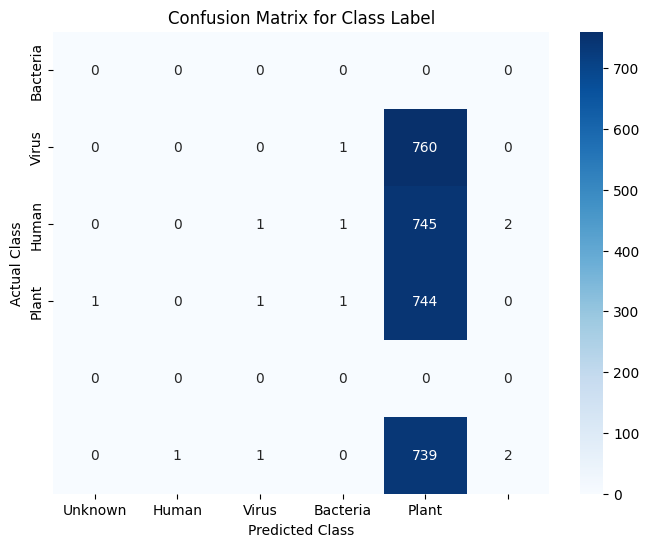


Confusion Matrix for Disease Risk:


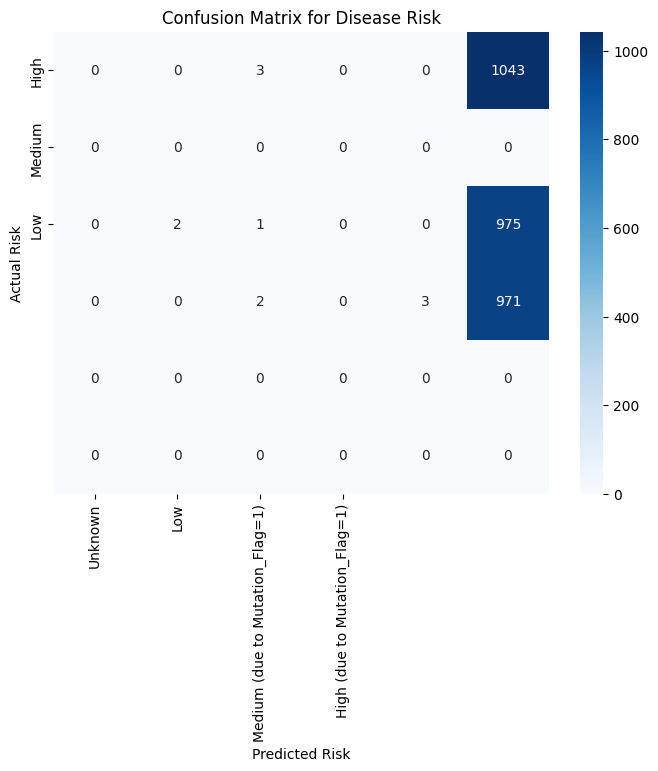

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Class Label predictions
accuracy_class = accuracy_score(df['Class_Label'], df['predicted_class'])
print(f"Accuracy for Class Label prediction: {accuracy_class:.4f}")

# Calculate accuracy for Disease Risk predictions
# Note: For ordered categories like Disease Risk (low, medium, high),
# simple accuracy might not tell the whole story. A confusion matrix
# or weighted metrics could provide more insight.
accuracy_risk = accuracy_score(df['Disease_Risk'], df['predicted_risk'])
print(f"Accuracy for Disease Risk prediction: {accuracy_risk:.4f}")

# You can also view a confusion matrix for more detailed evaluation
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nConfusion Matrix for Class Label:")
cm_class = confusion_matrix(df['Class_Label'], df['predicted_class'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_class, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['predicted_class'].unique(), yticklabels=df['Class_Label'].unique())
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Class Label')
plt.show()

print("\nConfusion Matrix for Disease Risk:")
cm_risk = confusion_matrix(df['Disease_Risk'], df['predicted_risk'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_risk, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['predicted_risk'].unique(), yticklabels=df['Disease_Risk'].unique())
plt.xlabel('Predicted Risk')
plt.ylabel('Actual Risk')
plt.title('Confusion Matrix for Disease Risk')
plt.show()

In [ ]:
# Define the dna
DNA = [
 "The battery lasts all day, but the phone gets hot during gaming.",
 "The screen is too dim outdoors, but I love the colors indoors.",
 "This phone is fast, but it keeps crashing when I open certain apps."
]

# Refine the prompt to include reviews
dnas = "\n".join([f"Review {i+1}: {dna}" for i, dna in enumerate(DNA)])

# Add initial prompt
refined_prompt = f""":
  Classify these dna as human, virus, bacteria or plan, and tag
  relevant the disease risk status such as low, medium, or
  high
  {dnas}
"""